In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks

In [2]:
train_images_array = np.load("train_data/train_images_full.npy")
train_labels_array = np.load("train_data/train_labels_full.npy")

In [3]:
train_images_array.shape

(15677, 224, 224, 3)

In [4]:
train_labels_array = to_categorical(train_labels_array, dtype="int")

In [5]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

2022-06-13 11:52:51.817468: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
for layers in (vggmodel.layers)[:15]:
    layers.trainable = False

In [7]:
dense_layer2 = vggmodel.layers[-2].output
prediction_layer = Dense(units=2, activation="softmax")(dense_layer2)

vgecocup = Model(inputs=vggmodel.input, outputs=prediction_layer)
optimizer = Adam(learning_rate=0.0001)
vgecocup.compile(optimizer=optimizer,
                 loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])
vgecocup.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(
    train_images_array, train_labels_array, test_size=0.10)

In [9]:
X_train_model.shape

(14109, 224, 224, 3)

In [10]:
X_test_model.shape

(1568, 224, 224, 3)

In [12]:
hist = vgecocup.fit(
    x=X_train_model,
    y=y_train_model,
    verbose=1,
    batch_size=28,
    steps_per_epoch=10,
    epochs=50,
)

Epoch 1/50
10/10 [==============================] - 96s 10s/step - loss: 0.2962 - accuracy: 0.9250
Epoch 2/50
10/10 [==============================] - 93s 9s/step - loss: 0.2074 - accuracy: 0.9500
Epoch 3/50
10/10 [==============================] - 95s 10s/step - loss: 0.1576 - accuracy: 0.9500
Epoch 4/50
10/10 [==============================] - 108s 11s/step - loss: 0.0589 - accuracy: 0.9821
Epoch 5/50
10/10 [==============================] - 86s 9s/step - loss: 0.1579 - accuracy: 0.9571
Epoch 6/50
10/10 [==============================] - 97s 10s/step - loss: 0.1171 - accuracy: 0.9500
Epoch 7/50
10/10 [==============================] - 90s 9s/step - loss: 0.1236 - accuracy: 0.9571
Epoch 8/50
10/10 [==============================] - 87s 9s/step - loss: 0.0871 - accuracy: 0.9643
Epoch 9/50
10/10 [==============================] - 86s 9s/step - loss: 0.1042 - accuracy: 0.9643
Epoch 10/50
10/10 [==============================] - 90s 9s/step - loss: 0.0774 - accuracy: 0.9714
Epoch 11/50
10

In [30]:
y_true = np.load("train_data/train_labels_full.npy")
y_pred = []
for image in X_test_model:
    img = np.expand_dims(image, axis=0)
    prediction = vgecocup.predict(img)
    if prediction[0][1] > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

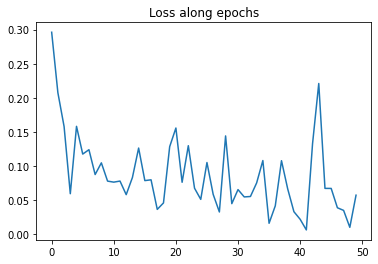

In [36]:
plt.plot(hist.history["loss"])
plt.title("Loss along epochs")
plt.show()

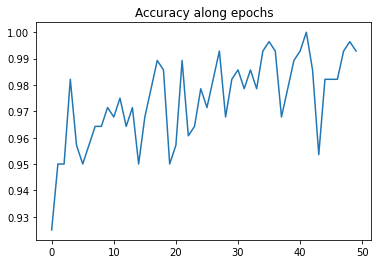

In [37]:
plt.plot(hist.history["accuracy"])
plt.title("Accuracy along epochs")
plt.show()

In [24]:
y_true = y_test_model[:, 1]

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1018
           1       0.97      0.99      0.98       550

    accuracy                           0.99      1568
   macro avg       0.99      0.99      0.99      1568
weighted avg       0.99      0.99      0.99      1568



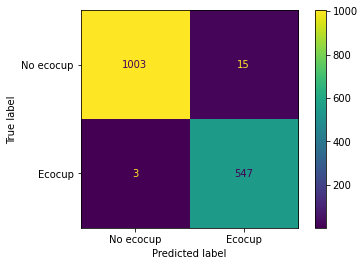

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_pred=np.array(y_pred), y_true=y_true))
cm = confusion_matrix(y_pred=y_pred, y_true=y_true)
disp = ConfusionMatrixDisplay(cm, display_labels=["No ecocup", "Ecocup"])
disp.plot()

In [28]:
vgecocup.save("models/vgecocup_version2")

2022-06-13 13:34:36.268814: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/vgecocup_version2/assets


In [29]:
np.save("train_data/X_train", X_train_model)
np.save("train_data/X_test", X_test_model)
np.save("train_data/y_train", y_train_model)
np.save("train_data/y_test", y_test_model)